# Une mesure de l'inflation liée aux journaux - Projet Python pour la Data-science

### Auteurs : Lise Marchal, Raphaël Pereira et Raphaël Zambélli--Palacio

Ce notebook a pour objectif de présenter les travaux de recherche effectués dans le cadre du cours de Projet Python pour la data-science de la 2A ENSAE.

## Problématique :

Les périodes caractérisées par un taux d'inflation élevé coïcident-elles avec celles de traitement médiatique accru de cette thématique ?


# 1- Statistiques descriptives des mesures d'inflation sur la période

## 1.1- Récupération et nettoyage des données d'inflation de la FED de Saint-Louis

### 1.1.1- Utilisation de l'API de la FRED:

lien documentation pour obtenir les séries d'inflation: https://fred.stlouisfed.org/docs/api/fred/series_observations.html

In [292]:
# Récupération de la clé
import os
from dotenv import load_dotenv


In [293]:
# Création de l'URL permettant d'accéder à la série:  Consumer Price Index for All Urban Consumers: All Items in U.S. City Average
load_dotenv()
api_root="https://api.stlouisfed.org/fred/series/observations"
series_id="CPIAUCNS"
api_key=os.getenv("FREDToken")
file_type="json"

url_api = (
    f"{api_root}?"
    + f"series_id={series_id}&"
    + f"api_key={api_key}&"
    + f"file_type={file_type}"
)

In [294]:
#Requête

import requests

req = requests.get(url_api)
wb = req.json()

In [295]:
#données imbriquées?
print(req.content[:1000])



b'{"realtime_start":"2024-12-12","realtime_end":"2024-12-12","observation_start":"1600-01-01","observation_end":"9999-12-31","units":"lin","output_type":1,"file_type":"json","order_by":"observation_date","sort_order":"asc","count":1343,"offset":0,"limit":100000,"observations":[{"realtime_start":"2024-12-12","realtime_end":"2024-12-12","date":"1913-01-01","value":"9.800"},{"realtime_start":"2024-12-12","realtime_end":"2024-12-12","date":"1913-02-01","value":"9.800"},{"realtime_start":"2024-12-12","realtime_end":"2024-12-12","date":"1913-03-01","value":"9.800"},{"realtime_start":"2024-12-12","realtime_end":"2024-12-12","date":"1913-04-01","value":"9.800"},{"realtime_start":"2024-12-12","realtime_end":"2024-12-12","date":"1913-05-01","value":"9.700"},{"realtime_start":"2024-12-12","realtime_end":"2024-12-12","date":"1913-06-01","value":"9.800"},{"realtime_start":"2024-12-12","realtime_end":"2024-12-12","date":"1913-07-01","value":"9.900"},{"realtime_start":"2024-12-12","realtime_end":"202

### 1.1.2- Nettoyage des données

#### Création et première exploration du dataframe

In [296]:
# Import des bibliothèques utiles: 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [297]:
# Création d'un dataframe à partir du fichier json

CPI_Urban=pd.json_normalize(wb["observations"]) #nested data?

In [298]:
CPI_Urban.head()

,realtime_start,realtime_end,date,value
0,2024-12-12,2024-12-12,1913-01-01,9.800
1,2024-12-12,2024-12-12,1913-02-01,9.800
2,2024-12-12,2024-12-12,1913-03-01,9.800
3,2024-12-12,2024-12-12,1913-04-01,9.800
4,2024-12-12,2024-12-12,1913-05-01,9.700


In [299]:
# On ne garde que les deux dernières colonnes
CPI_Urban = CPI_Urban[["date", "value"]]
CPI_Urban.head()


,date,value
0,1913-01-01,9.800
1,1913-02-01,9.800
2,1913-03-01,9.800
3,1913-04-01,9.800
4,1913-05-01,9.700


In [300]:
# Infos générales
CPI_Urban.axes

[RangeIndex(start=0, stop=1343, step=1),
 Index(['date', 'value'], dtype='object')]

In [301]:
# Infos générales: types
CPI_Urban.dtypes

date     object
value    object
dtype: object

#### Traitement des values

In [302]:
CPI_Urban['value'] = pd.to_numeric(CPI_Urban['value'], errors='coerce')


#### Traitement des dates

In [303]:
CPI_Urban['date'] = pd.to_datetime(CPI_Urban['date'])
CPI_Urban['year'] = CPI_Urban['date'].dt.year
CPI_Urban['month'] = CPI_Urban['date'].dt.month

CPI_Urban.head()

,date,value,year,month
0,1913-01-01,9.8,1913,1
1,1913-02-01,9.8,1913,2
2,1913-03-01,9.8,1913,3
3,1913-04-01,9.8,1913,4
4,1913-05-01,9.7,1913,5


#### Création de la variable pourcentage d'inflation annuelle: 

Le jeu de données se présente en effet sous la forme d'indices avec une base 100 en 1983. 
Limite: Il n'est pas idéal d'avoir la date de la base postérieure à la période étudiée.  

In [304]:
CPI_Urban['inf_an']=((CPI_Urban['value']-CPI_Urban['value'].shift(12))/CPI_Urban['value'].shift(12))*100
CPI_Urban.head(20)

,date,value,year,month,inf_an
0,1913-01-01,9.8,1913,1,NaN
1,1913-02-01,9.8,1913,2,NaN
2,1913-03-01,9.8,1913,3,NaN
3,1913-04-01,9.8,1913,4,NaN
4,1913-05-01,9.7,1913,5,NaN
5,1913-06-01,9.8,1913,6,NaN
6,1913-07-01,9.9,1913,7,NaN
7,1913-08-01,9.9,1913,8,NaN
8,1913-09-01,10.0,1913,9,NaN
9,1913-10-01,10.0,1913,10,NaN


#### Création d'un sous-tableau de la période considérée

In [305]:
CPI_sub = CPI_Urban[(CPI_Urban['year'] > 1913) & (CPI_Urban['year'] < 1963)]
CPI_sub.head(5)


,date,value,year,month,inf_an
12,1914-01-01,10.0,1914,1,2.040816
13,1914-02-01,9.9,1914,2,1.020408
14,1914-03-01,9.9,1914,3,1.020408
15,1914-04-01,9.8,1914,4,0.000000
16,1914-05-01,9.9,1914,5,2.061856


In [306]:
CPI_sub.tail(5)

,date,value,year,month,inf_an
595,1962-08-01,30.3,1962,8,1.337793
596,1962-09-01,30.4,1962,9,1.333333
597,1962-10-01,30.4,1962,10,1.333333
598,1962-11-01,30.4,1962,11,1.333333
599,1962-12-01,30.4,1962,12,1.333333


## 1.2- Traitement des données sur l'inflation

### 1.2.1- Premières statistiques descriptives sur l'inflation pendant la période

#### Premières statistiques sur l'ensemble du dataframe (1914-1962)

In [307]:
CPI_sub['inf_an'].describe()

count    588.000000
mean       2.517532
std        6.607607
min      -15.789474
25%       -0.578035
50%        1.449275
75%        3.764927
max       23.668639
Name: inf_an, dtype: float64

Grâce à ces premières statistiques, on peut déjà constater que l'inflation annuelle moyenne entre 1914 et 1962 est positive, et relativement proche des cibles d'inflation traditionnelles (environ 2.5%). Cependant, on observe également une volatilité non négligeable avec à un écart-type à 6.6 et surtout un pourcentage d'inflation minimum à -15.8% et un maximum à 23.7%, des niveaux respectivement bien inférieurs et supérieurs à ceux observés dans les décennies plus récentes. Le pourcentage d'inflation annuel médian est inférieur au pourcentage d'inflation moyenne ce qui indique une distribution plus dispersée vers le haut.

#### Figure 1: Evolution du pourcentage d'inflation annuelle par mois sur l'ensemble de la période

In [308]:
import plotly
import plotly.express as px
import plotly.io as pio

In [309]:
# Création d'une fonction de base pour la création de graphiques linéaires

def figure (df, abs, ord, titre, x_title, x_format, y_title, val_rem):

    # Création du graphique
    graph = px.line(
        df, 
        x=abs, 
        y=ord, 
        title=titre
    )
    # Légende et format des axes
    graph.update_xaxes(title=x_title, tickformat=x_format)
    graph.update_yaxes(title=y_title)

    # Style du graphique
    graph.update_layout(template="plotly_dark")

    # Mise en évidence des valeurs remarquables (moyenne et médiane)
    if val_rem==True:
        mean=df[ord].mean()
        median=df[ord].median()
        
        graph.add_hline(y=mean, line_dash="dot", line_color="yellow", annotation_text="Moyenne", annotation_position="top left", annotation_font_color="yellow")
        graph.add_hline(y=median, line_dash="dot", line_color="white", annotation_text="Médiane", annotation_position="bottom right", annotation_font_color="white")
        graph.add_hline(y=0, line_color="red")

    graph.show(config={"scrollZoom": True, "displayModeBar": True})

    return graph
    

In [310]:
figure (
    CPI_sub, 
    "date", 
    "inf_an", 
    "Figure 1: Pourcentage d'inflation annuelle de 1914 à 1962", 
    "Date", 
    "%Y", 
    "Inflation (%)",
    True
)

On observe un pic d'inflation pendant la deuxième partie de la Première Guerre mondiale et dans l'immédiat après-guerre avec le maximum d'inflation étant atteint en 1920. Cette période est suivie de la déflation la plus importante de la période entre 1921 et 1923, le minimum y étant atteint. La crise des années 30 engendre la deuxième période notable de déflation jusqu'en 1933. L'inflation reste faible jusqu'à la Seconde Guerre mondiale où on retrouve un pic d'inflation à 13%. On constate cependant une baisse jusqu'à 0% vers la fin du conflit avant d'atteindre un nouveau pic en 1947. L'inflation se stabilise sur la fin de la période, exception faite de 1951. 

### 1.2.2- Identification de périodes d'intérêt

#### Identification des périodes d'inflation négative

In [311]:
# Création d'une indicatrice inf_neg qui prend la valeur 1 si l'inflation est négative et 0 sinon
CPI_sub.loc[:,'inf_neg']=0
CPI_sub.loc[CPI_sub['inf_an'] < 0, 'inf_neg'] = 1
CPI_sub.head(30)

C:\Users\lisem\AppData\Local\Temp\ipykernel_21736\1604323234.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,value,year,month,inf_an,inf_neg
12,1914-01-01,10.0,1914,1,2.040816,0
13,1914-02-01,9.9,1914,2,1.020408,0
14,1914-03-01,9.9,1914,3,1.020408,0
15,1914-04-01,9.8,1914,4,0.000000,0
16,1914-05-01,9.9,1914,5,2.061856,0
17,1914-06-01,9.9,1914,6,1.020408,0
18,1914-07-01,10.0,1914,7,1.010101,0
19,1914-08-01,10.2,1914,8,3.030303,0
20,1914-09-01,10.2,1914,9,2.000000,0
21,1914-10-01,10.1,1914,10,1.000000,0


In [312]:
# Premières informations sur les périodes d'inflation négatives: 
CPI_neg=CPI_sub[CPI_sub['inf_neg'] == 1]
CPI_neg['inf_an'].describe()


count    158.000000
mean      -4.149776
std        4.029451
min      -15.789474
25%       -7.680995
50%       -2.228430
75%       -0.980392
max       -0.371747
Name: inf_an, dtype: float64

A commenter

#### Identification des périodes d'accélération et de descélération

Pour mesurer l'accélération et la descélération de l'inflation, le choix a été fait de s'intéresser à la différence relative par rapport au pourcentage d'inflation de l'année précédente au même mois.
En raison du nombre important de valeurs négatives, l'échelle logarithmique n'a pas été retenue malgré les avantages qu'elle aurait eu, notamment en raison des forts pourcentages d'évolution. Le choix de calculer des taux de croissance pose néanmoins le problème des valeurs nulles créant des pourcentages d'évolution infinis. On les remplace par les moyennes des valeurs précédentes et suivantes pour lisser la représentation lorsqu'elles sont isolées, sinon par les valeurs précédentes ou suivantes. 

In [313]:
# Création du pourcentage d'évolution de l'inflation
CPI_sub.loc[:, 'acceleration_12'] = (CPI_sub['inf_an']/CPI_sub['inf_an'].shift(12) - 1)*100 
CPI_sub.head(30)


C:\Users\lisem\AppData\Local\Temp\ipykernel_21736\3819855802.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,value,year,month,inf_an,inf_neg,acceleration_12
12,1914-01-01,10.0,1914,1,2.040816,0,NaN
13,1914-02-01,9.9,1914,2,1.020408,0,NaN
14,1914-03-01,9.9,1914,3,1.020408,0,NaN
15,1914-04-01,9.8,1914,4,0.000000,0,NaN
16,1914-05-01,9.9,1914,5,2.061856,0,NaN
17,1914-06-01,9.9,1914,6,1.020408,0,NaN
18,1914-07-01,10.0,1914,7,1.010101,0,NaN
19,1914-08-01,10.2,1914,8,3.030303,0,NaN
20,1914-09-01,10.2,1914,9,2.000000,0,NaN
21,1914-10-01,10.1,1914,10,1.000000,0,NaN


In [314]:
# Traitement des pourcentages d'évolution infinis

# On le fait un nb arbitraire de fois pour traiter les cas de 3,4,5,6 valeurs infinies se suivant. 
# On ne fait pas une boucle while par exemple sur la moyenne pour éviter les boucles infinies

for i in range(5):
    # traitement des valeurs infinies isolées: remplacement par la moyenne entre la valeur précédente et la valeur suivante
    CPI_sub.loc[
        abs(CPI_sub["acceleration_12"]) == np.inf,
        "acceleration_12"
    ] = (CPI_sub["acceleration_12"].shift(1) + CPI_sub["acceleration_12"].shift(-1)) / 2
    #traitement des valeurs infinies suivies de valeurs infinies: remplacement par la valeur précédente
    CPI_sub.loc[
        (abs(CPI_sub["acceleration_12"]) == np.inf) & (abs(CPI_sub["acceleration_12"].shift(-1)) == np.inf),
        "acceleration_12"
    ] = CPI_sub["acceleration_12"].shift(1)

    #traitement des valeurs infinies précédées de valeurs infinies: remplacement par la valeur suivante
    CPI_sub.loc[
        (abs(CPI_sub["acceleration_12"]) == np.inf) & (abs(CPI_sub["acceleration_12"].shift(1)) == np.inf),
        "acceleration_12"
    ] = CPI_sub["acceleration_12"].shift(-1)

CPI_sub.head(20)



,date,value,year,month,inf_an,inf_neg,acceleration_12
12,1914-01-01,10.0,1914,1,2.040816,0,NaN
13,1914-02-01,9.9,1914,2,1.020408,0,NaN
14,1914-03-01,9.9,1914,3,1.020408,0,NaN
15,1914-04-01,9.8,1914,4,0.000000,0,NaN
16,1914-05-01,9.9,1914,5,2.061856,0,NaN
17,1914-06-01,9.9,1914,6,1.020408,0,NaN
18,1914-07-01,10.0,1914,7,1.010101,0,NaN
19,1914-08-01,10.2,1914,8,3.030303,0,NaN
20,1914-09-01,10.2,1914,9,2.000000,0,NaN
21,1914-10-01,10.1,1914,10,1.000000,0,NaN


In [315]:
figure (
    CPI_sub, 
    "date", 
    "acceleration_12", 
    "Figure 2: Pourcentage d'accélération de l'inflation annuelle par rapport à sa valeur l'année précédente de 1915 à 1962", 
    "Date", 
    "%Y", 
    "Accélération (%)",
    False
)

# 2- Analyse de fréquence sur le corpus de presse

## 2.1- Création des fichiers de fréquence

## 2.2- Statistiques descriptives sur les fréquences

In [316]:
# Récupération des données: voir si adaptation une fois les emrges effectués
dates=["1940_1949","1950_1959","1960_1963"]

df = {}

for date in dates: 
    url=(
        "frequences_data_"
        + f"{date}"
        +".csv"
    )
    
    df[f"freq_{date}"] = pd.read_csv(url)




Prise en main d'une table (une décennie)

In [317]:
df["freq_1940_1949"].head()

,key,nbre_articles,inflation,disinflation,inflationary,deflation,prices,cost,wages,currency,...,consumption basket,purchasing power,consumer price index,rise in prices,fall in prices,cost of living,inflation expectations,money supply growth,central bank policy,economic price adjustments
0,1940-01,40090,4,0,3,1,778,1557,184,81,...,0,27,0,1,0,11,0,0,0,0
1,1940-02,41579,3,0,2,1,760,1534,177,83,...,0,23,0,1,0,8,0,0,0,0
2,1940-03,47118,0,0,0,1,852,1769,198,75,...,0,18,0,1,0,7,0,0,0,0
3,1940-04,44607,2,0,1,0,802,1622,154,88,...,0,18,0,2,0,5,0,0,0,0
4,1940-05,43840,3,0,2,2,818,1879,216,53,...,0,10,0,1,0,15,0,0,0,0


In [318]:
df["freq_1940_1949"].dtypes

key                           object
nbre_articles                  int64
inflation                      int64
disinflation                   int64
inflationary                   int64
deflation                      int64
prices                         int64
cost                           int64
wages                          int64
currency                       int64
money                          int64
devaluation                    int64
recession                      int64
stagflation                    int64
economy                        int64
market                         int64
increase                       int64
decrease                       int64
cpi                            int64
price level                    int64
wage growth                    int64
economic downturn              int64
monetary policy                int64
cost increase                  int64
cost reduction                 int64
market prices                  int64
inflation rate                 int64
i

In [319]:
# Transformation des éléments de la colonne key en objet date
df["freq_1940_1949"]['key'] = pd.to_datetime(df["freq_1940_1949"]['key'])

In [320]:
desc=df["freq_1940_1949"].describe()
print(desc['nbre_articles'])
desc

count      120.000000
mean     40231.050000
min      26207.000000
25%      34875.250000
50%      39018.000000
75%      46568.500000
max      55377.000000
std       7455.826587
Name: nbre_articles, dtype: float64


,key,nbre_articles,inflation,disinflation,inflationary,deflation,prices,cost,wages,currency,...,consumption basket,purchasing power,consumer price index,rise in prices,fall in prices,cost of living,inflation expectations,money supply growth,central bank policy,economic price adjustments
count,120,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.00000,...,120.0,120.000000,120.000000,120.000000,120.000000,120.00000,120.0,120.0,120.0,120.0
mean,1944-12-15 18:00:00,40231.050000,20.850000,0.100000,12.025000,2.733333,881.791667,1624.791667,301.150000,55.55000,...,0.0,18.241667,0.175000,2.416667,0.016667,45.67500,0.0,0.0,0.0,0.0
min,1940-01-01 00:00:00,26207.000000,0.000000,0.000000,0.000000,0.000000,530.000000,943.000000,97.000000,19.00000,...,0.0,2.000000,0.000000,0.000000,0.000000,4.00000,0.0,0.0,0.0,0.0
25%,1942-06-23 12:00:00,34875.250000,8.000000,0.000000,6.000000,1.000000,738.750000,1424.750000,222.750000,43.00000,...,0.0,12.750000,0.000000,1.000000,0.000000,26.00000,0.0,0.0,0.0,0.0
50%,1944-12-16 12:00:00,39018.000000,16.000000,0.000000,11.000000,2.000000,874.000000,1607.000000,279.500000,53.00000,...,0.0,17.000000,0.000000,2.000000,0.000000,45.00000,0.0,0.0,0.0,0.0
75%,1947-06-08 12:00:00,46568.500000,27.000000,0.000000,16.250000,4.000000,998.000000,1808.500000,351.250000,67.25000,...,0.0,22.000000,0.000000,3.250000,0.000000,60.00000,0.0,0.0,0.0,0.0
max,1949-12-01 00:00:00,55377.000000,134.000000,3.000000,50.000000,13.000000,1416.000000,2155.000000,797.000000,119.00000,...,0.0,55.000000,3.000000,13.000000,1.000000,143.00000,0.0,0.0,0.0,0.0
std,NaN,7455.826587,20.343128,0.491952,8.806474,2.420964,188.295311,254.656892,124.552486,18.47044,...,0.0,9.201750,0.496416,2.136452,0.128556,25.77249,0.0,0.0,0.0,0.0


In [321]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Explained variance ratio (first 2 components): [0.22960712 0.1034657 ]
Total variance explained by 2 components: 0.33307282904205965


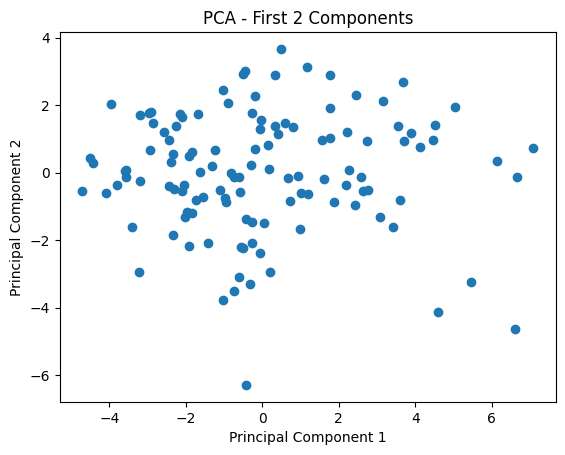

In [323]:
# Sélection des variables numériques
numeric_df = df["freq_1940_1949"].select_dtypes(include=[np.number]) 


# Standardisation
scaler = StandardScaler()
freq_scaled = scaler.fit_transform(numeric_df)

# ACP
pca = PCA(n_components=2)  # Réduire à deux composantes
pca_result = pca.fit_transform(freq_scaled)

print(f"Explained variance ratio (first 2 components): {pca.explained_variance_ratio_}")
print(f"Total variance explained by 2 components: {sum(pca.explained_variance_ratio_)}")

plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA - First 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Analyse via le total des articles

In [167]:

df["freq_1940_1949"]['total'] = df["freq_1940_1949"].drop(columns=['key', 'nbre_articles']).sum(axis=1)
df["freq_1940_1949"].head(1)

,key,nbre_articles,inflation,disinflation,inflationary,deflation,prices,cost,wages,currency,...,purchasing power,consumer price index,rise in prices,fall in prices,cost of living,inflation expectations,money supply growth,central bank policy,economic price adjustments,total
0,1940-01,40090,4,0,3,1,778,1557,184,81,...,27,0,1,0,11,0,0,0,0,6715


In [168]:
df["freq_1940_1949"]['perc'] = (df["freq_1940_1949"]["total"]/df["freq_1940_1949"]["nbre_articles"])*100
df["freq_1940_1949"].head(1)

,key,nbre_articles,inflation,disinflation,inflationary,deflation,prices,cost,wages,currency,...,consumer price index,rise in prices,fall in prices,cost of living,inflation expectations,money supply growth,central bank policy,economic price adjustments,total,perc
0,1940-01,40090,4,0,3,1,778,1557,184,81,...,0,1,0,11,0,0,0,0,6715,16.749813


In [169]:
graph = px.line(df["freq_1940_1949"], x="key", y="perc", title="Pourcentage d'articles mentionnant des termes liés à l'inflation par date pour les années 40")

# Légende et format des axes
graph.update_xaxes(title="Date", tickformat="%m-%Y")
graph.update_yaxes(title="Pourcentage d'articles")

# Style du graphique
graph.update_layout(template="plotly_dark")

mean=df["freq_1940_1949"]["perc"].mean()
median=df["freq_1940_1949"]["perc"].median()

graph.add_hline(y=mean, line_dash="dot", line_color="yellow", annotation_text="Moyenne", annotation_position="top left", annotation_font_color="yellow")
graph.add_hline(y=median, line_dash="dot", line_color="white", annotation_text="Médiane", annotation_position="bottom right", annotation_font_color="white")

# Afficher le graphique avec zoom possible et barre à outil
graph.show(renderer="browser",config={"scrollZoom": True, "displayModeBar": True})

Analyse plus précise selon les termes utilisés

In [170]:
sections = [col for col in df["freq_1940_1949"].columns if col not in ['key','nbre_articles','perc','total']]
print(sections)

# Transform DataFrame from Wide to Long Format
df_long = df["freq_1940_1949"].melt(
    id_vars='key',  
    value_vars=sections,  
    var_name='Section',
    value_name='Value'
)

graph = px.bar(
    df_long,
    x='key',  
    y='Value',    
    color='Section',  
    title='Termes dans le champ lexical de linflation',
    labels={'Value': 'nb articles', 'key': 'Dates'}
)

graph.update_layout(template="plotly_dark")

graph.show(config={"scrollZoom": True, "displayModeBar": True})

['inflation', 'disinflation', 'inflationary', 'deflation', 'prices', 'cost', 'wages', 'currency', 'money', 'devaluation', 'recession', 'stagflation', 'economy', 'market', 'increase', 'decrease', 'cpi', 'price level', 'wage growth', 'economic downturn', 'monetary policy', 'cost increase', 'cost reduction', 'market prices', 'inflation rate', 'interest rates', 'price stability', 'consumption basket', 'purchasing power', 'consumer price index', 'rise in prices', 'fall in prices', 'cost of living', 'inflation expectations', 'money supply growth', 'central bank policy', 'economic price adjustments']


Comparaison avec les pourcentages d'inflation

In [171]:
import plotly.graph_objects as go

In [172]:
#faire par dico aussi
CPI_40=CPI_sub[(CPI_sub['year']>1939) & (CPI_sub['year']<1950) ]

graph = go.Figure()

graph.add_trace(go.Scatter(
    x=CPI_40['date'], 
    y=CPI_40['inf_an'], 
    mode='lines', 
    name='Inflation annuelle',
    yaxis='y'  # Associate with the left y-axis
))

# Add the second trace (right y-axis)
graph.add_trace(go.Scatter(
    x=df["freq_1940_1949"]['key'], 
    y=df["freq_1940_1949"]['perc'], 
    mode='lines', 
    name='Fréquence',
    yaxis='y2'  # Associate with the right y-axis
))

# Update layout with dual y-axes
graph.update_layout(
    title='Comparaison pourcentage inflation annuelle et fréquence',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Pourcentage inflation annuelle', side='left'),
    yaxis2=dict(
        title='Fréquence',
        side='right',
        overlaying='y'  # Overlay on the same plot area
    ),
    template="plotly_dark"
)

# Show the plot
graph.show(config={"scrollZoom": True, "displayModeBar": True})

Comparaison avec les pourcentages d'accélération de l'inflation

In [173]:
#faire la même chose avec accélération

## 3- Régression linéaire

In [174]:
import statsmodels.api as sm

Régression linéaire simple du pourcentage d'inflation sur les fréquences 

In [ ]:
# Fusion des tables de fréquence et de pourcentage d'inflation (à faire avant potentiellement)+ faire sur toutes les périodes

# Transformation des éléments de la colonne key en objet date
df["freq_1940_1949"]['key'] = pd.to_datetime(df["freq_1940_1949"]['key'])

inf_freq=pd.merge(CPI_40, df["freq_1940_1949"], left_on='date', right_on='key')

inf_freq.head()


,date,value,year,month,inf_an,inf_neg,acceleration_12,key,nbre_articles,inflation,...,consumer price index,rise in prices,fall in prices,cost of living,inflation expectations,money supply growth,central bank policy,economic price adjustments,total,perc
0,1940-01-01,13.9,1940,1,-0.714286,1,-49.285714,1940-01-01,40090,4,...,0,1,0,11,0,0,0,0,6715,16.749813
1,1940-02-01,14.0,1940,2,0.719424,0,-150.719424,1940-02-01,41579,3,...,0,1,0,8,0,0,0,0,6504,15.642512
2,1940-03-01,14.0,1940,3,0.719424,0,-150.719424,1940-03-01,47118,0,...,0,1,0,7,0,0,0,0,7006,14.869052
3,1940-04-01,14.0,1940,4,1.449275,0,-151.449275,1940-04-01,44607,2,...,0,2,0,5,0,0,0,0,6151,13.789316
4,1940-05-01,14.0,1940,5,1.449275,0,-168.115942,1940-05-01,43840,3,...,0,1,0,15,0,0,0,0,6631,15.125456


In [176]:
x=inf_freq["perc"] #covariable
y=inf_freq["inf_an"] #variable dépendante

x = sm.add_constant(x) #constante


model = sm.OLS(y, x)
results = model.fit()

print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                 inf_an   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     38.68
Date:                Mon, 23 Dec 2024   Prob (F-statistic):           7.84e-09
Time:                        17:51:09   Log-Likelihood:                -356.64
No. Observations:                 120   AIC:                             717.3
Df Residuals:                     118   BIC:                             722.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.9620      3.026     -4.284      0.0